## 1. Giới thiệu

Giới thiệu mục tiêu của Lab:

Tìm hiểu biểu diễn từ bằng vector (Word Embedding)

Thực hành với mô hình GloVe và mô hình Word2Vec tự huấn luyện

So sánh, phân tích và trực quan hóa không gian vector

## 2. Tải mô hình Word Embedding pre-trained (GloVe)


In [2]:
import gensim.downloader as api

print("Tải mô hình pre-trained GloVe...")
model = api.load("glove-wiki-gigaword-50")
print("Đã tải xong mô hình!")


Tải mô hình pre-trained GloVe...
Đã tải xong mô hình!


## 3. Thực hiện các phép kiểm tra

In [3]:
print("Vector cho từ 'king':\n", model['king'][:10])

print("\nĐộ tương đồng giữa 'king' và 'queen':", model.similarity('king', 'queen'))
print("Độ tương đồng giữa 'king' và 'man':", model.similarity('king', 'man'))

print("\n10 từ tương tự 'computer':")
for word, sim in model.most_similar('computer', topn=10):
    print(f"  {word:10s} -> {sim:.4f}")


Vector cho từ 'king':
 [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012 ]

Độ tương đồng giữa 'king' và 'queen': 0.7839043
Độ tương đồng giữa 'king' và 'man': 0.53093773

10 từ tương tự 'computer':
  computers  -> 0.9165
  software   -> 0.8815
  technology -> 0.8526
  electronic -> 0.8126
  internet   -> 0.8060
  computing  -> 0.8026
  devices    -> 0.8016
  digital    -> 0.7992
  applications -> 0.7913
  pc         -> 0.7883


## 4.Biểu diễn câu

In [4]:
import numpy as np

def embed_sentence(sentence, model):
    words = [w.lower() for w in sentence.split() if w.lower() in model.key_to_index]
    vectors = np.array([model[w] for w in words])
    return np.mean(vectors, axis=0)

sentence = "The queen rules the country."
doc_vec = embed_sentence(sentence, model)
print("\nVector biểu diễn câu:")
print(doc_vec[:10])



Vector biểu diễn câu:
[ 0.06438001  0.43381    -0.779435    0.0075025   0.07915     0.20077899
 -0.2454325  -0.05369498 -0.00951262 -0.68774253]


## 5. Trực quan hóa Word Embeddings

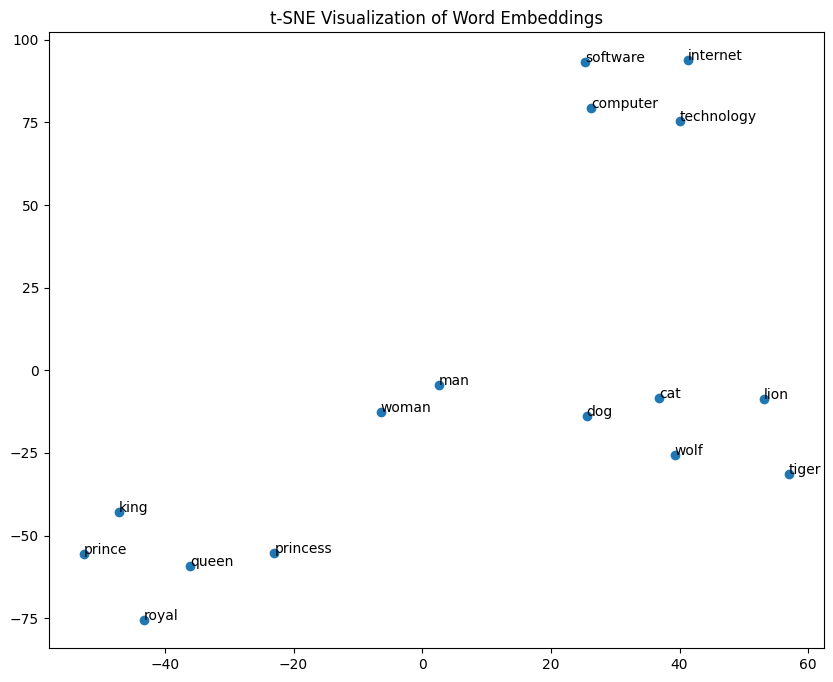

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = ['king', 'queen', 'man', 'woman', 'prince', 'princess', 'royal',
         'computer', 'software', 'technology', 'internet',
         'dog', 'cat', 'wolf', 'lion', 'tiger']

vectors = np.array([model[w] for w in words])
reducer = TSNE(n_components=2, random_state=42, perplexity=5, max_iter=3000)
reduced = reducer.fit_transform(vectors)

plt.figure(figsize=(10,8))
plt.scatter(reduced[:,0], reduced[:,1])
for i, word in enumerate(words):
    plt.annotate(word, (reduced[i,0], reduced[i,1]))
plt.title("t-SNE Visualization of Word Embeddings")
plt.show()


## 6. Phân tích và Nhận xét
Các cụm từ như king, queen, prince, princess, royal nằm gần nhau → đúng kỳ vọng về ngữ nghĩa.

Nhóm computer, software, technology, internet tạo cụm riêng → phản ánh đúng lĩnh vực công nghệ.

Nhóm động vật cũng có sự gần gũi (dog, cat, lion, tiger, wolf).
→ Mô hình GloVe học được mối quan hệ ngữ nghĩa khá tốt.

Nếu so sánh với mô hình Word2Vec tự huấn luyện, các cụm có thể kém tách biệt hơn do dữ liệu nhỏ hơn.